#목차 
##1. 데이터 전처리

- 데이터 시각화 및 분석
- 레이블 인코딩

##2. 데이터 세트 분리

- 학습데이터 테스트 데이터 분류

##3. 모델학습

- 분류 모델 선택과 학습
- Decision tree, random forest, logistic regression,

##4. 예측수행

- 선택된 모델을 통해 테스트 데이터 예측

##5. 평가

- 학습으로 예측된 결과 값과 테스트 데이터의 실제 결과 값 비교 후 모델 성능 평가
- accuracy, precision, recall, f1 score, roc_acuc



### 데이터 전처리_파일 불러오기

In [83]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


adult_df_og = pd.read_csv('adult.csv',header = None , index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])


adult_df = adult_df_og.copy()
adult_df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### 데이터 전처리_파일의 기본 정보 확인

##### age : 나이
##### workclass : 고용 형태
##### fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
##### education : 교육 수준
##### education_num : 교육 수준 수치
##### marital_status: 결혼 상태
##### occupation : 업종
##### relationship : 가족 관계
##### race : 인종
##### sex : 성별
##### capital_gain : 양도 소득
##### capital_loss : 양도 손실
##### hours_per_week : 주당 근무 시간
##### native_country : 국적
##### income : 수익 (예측해야 하는 값)

In [84]:
print(adult_df.columns)   

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


#### dataframe의 정보확인
#### null값 확인
#### 'object'는 숫자형이 아닌 자료형 데이터이므로 전처리과정 필요

In [85]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 데이터 전처리_데이터 변환 ( >50K = 1,  <=50K = 0 )

In [86]:
#income의 문자열데이터를 0,1로 바꾸기 (object -> (adult_df['income'] == ' >50K')은 bool형) -> int)
adult_df['income'] = (adult_df['income'] == ' >50K').astype(int)
adult_df['income']


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

## 데이터 전처리_feature에 어떤 값들이 있는지 확인
#### 데이터 전처리_feature 값 중 '?' 가 있다는 것을 확인함. 그리고 대략적인 값의 분포를 확인 

In [87]:
#피처값이 몇개씩 있는지 확인
adult_df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [88]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### feature 값의 분포 시각화 

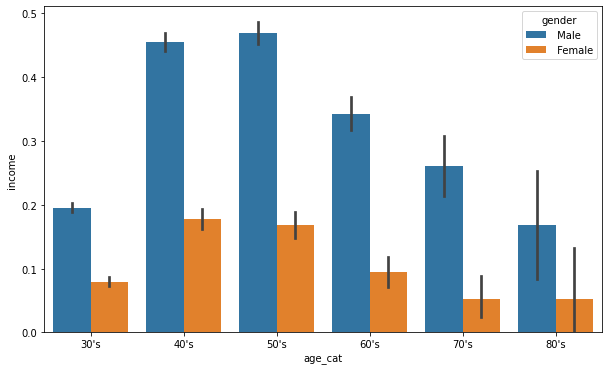

In [89]:
# 나이 및 성별에 따른 소득분포
def get_category(age):
    cat = ''
    if age < 40: cat = "30's"
    elif age < 50: cat = "40's"
    elif age < 60: cat = "50's"
    elif age < 70: cat = "60's"
    elif age < 80: cat = "70's"
    else: cat = "80's"
    
    return cat

plt.figure(figsize=(10,6))
group_names = ["30's", "40's", "50's", "60's", "70's", "80's"]

adult_df['age_cat'] = adult_df['age'].apply(lambda x : get_category(x))
sns.barplot(x = 'age_cat', y = 'income', hue = 'gender', data = adult_df, order = group_names)
adult_df.drop('age_cat', axis = 1, inplace = True)

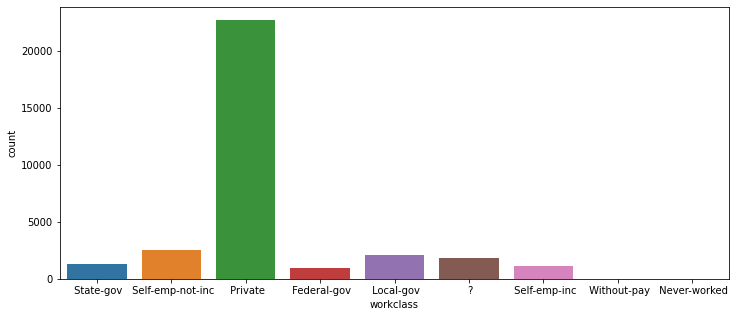

In [90]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=adult_df,x='workclass',ax=ax)#피처값 시각화
plt.show()

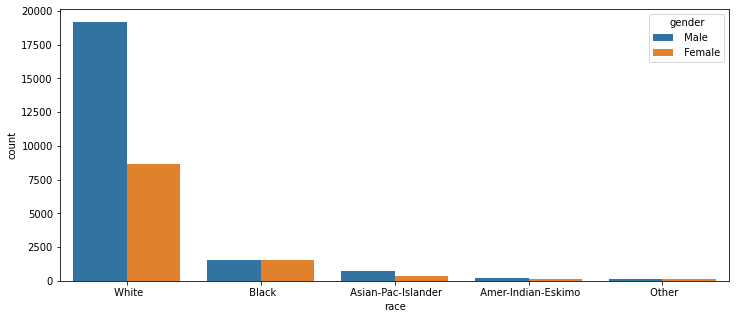

In [91]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=adult_df,x='race',ax=ax,hue='gender')
#피처값 시각화,#hue='',''값에 따라 다른 색상막대로 나누어 확인 가능 
plt.show()

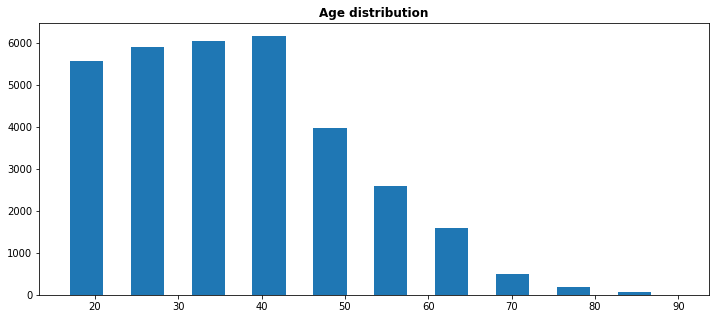

In [92]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
ax.hist(adult_df['age'],width=4)#히스토그램 #width라인 간격 조정 가능 
ax.set_title('Age distribution',fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


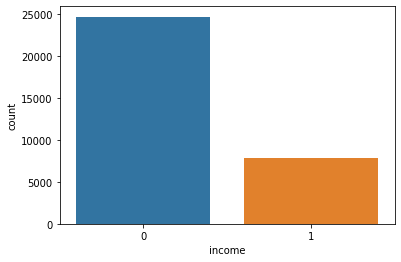

In [93]:
sns.countplot('income', data=adult_df)

## 1. 데이터 전처리
###  - feature와 label(income)과의 관계 확인  

#### education education-num

In [94]:
adult_df.groupby(['education','education-num'])[['income']].mean()

,,income
education,education-num,
10th,6,0.066452
11th,7,0.051064
12th,8,0.076212
1st-4th,2,0.035714
5th-6th,3,0.048048
7th-8th,4,0.061920
9th,5,0.052529
Assoc-acdm,12,0.248360
Assoc-voc,11,0.261216


In [95]:
adult_df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [96]:
adult_df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

#### 2 .'?'(결측치) 채우기

In [121]:
missing_columns = ['workclass', 'occupation', 'native-country']  #찾아보니 3개의 feature안에 '?' 있음
adult_df[missing_columns] == ' ?'

,workclass,occupation,native-country
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
32556,False,False,False
32557,False,False,False
32558,False,False,False
32559,False,False,False


In [132]:
(adult_df[missing_columns] == ' ?').sum()

workclass         0
occupation        0
native-country    0
dtype: int64

In [131]:
for column in missing_columns:
    adult_df.loc[adult_df_og[column] == ' ?', column] = adult_df_og[column].mode()[0]  #최빈값으로 바꿔줌. 
    

In [123]:
adult_df.head(20)

,age,workclass,fnlwgt,education-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,2671,13,0,1,4,1,7.684324,0.0,40,38,0
1,50,5,2926,13,3,0,4,1,0.000000,0.0,13,38,0
2,38,3,14086,9,5,1,4,1,0.000000,0.0,40,38,0
3,53,3,15336,7,5,0,2,1,0.000000,0.0,40,38,0
4,28,3,19355,13,9,5,2,0,0.000000,0.0,40,4,0
5,37,3,17700,14,3,5,4,0,0.000000,0.0,40,38,0
6,49,3,8536,5,7,1,2,0,0.000000,0.0,16,22,0
7,52,5,13620,9,3,0,4,1,0.000000,0.0,45,38,1
8,31,3,1318,14,9,1,4,0,9.552795,0.0,50,38,1
9,42,3,8460,13,3,0,4,1,8.552174,0.0,40,38,1


In [130]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education-num   32561 non-null  int64  
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  int64  
 6   race            32561 non-null  int64  
 7   gender          32561 non-null  int64  
 8   capital-gain    32561 non-null  float64
 9   capital-loss    32561 non-null  float64
 10  hours-per-week  32561 non-null  int64  
 11  native-country  32561 non-null  object 
 12  income          32561 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 3.2+ MB


### 3. 'capital-gain', 	'capital-loss' 값 조정 

In [129]:
adult_df['capital-gain'].value_counts()

0.000000     29849
9.617404       347
8.947416       284
8.895356       246
11.512915      159
             ...  
10.000614        1
7.777793         1
7.401842         1
7.839132         1
8.529122         1
Name: capital-gain, Length: 119, dtype: int64

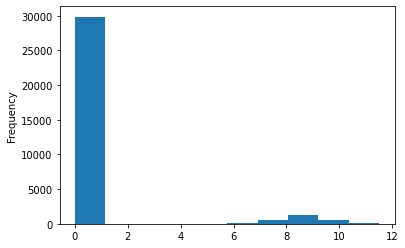

In [128]:
adult_df['capital-gain'].plot.hist()

In [ ]:
adult_df['capital-loss'].value_counts()

In [ ]:
adult_df['capital-loss'].plot.hist()

#### 너무 값이 한쪽으로 치우쳐있다. 로그함수를 사용하여 'capital-gain'과 'capital-loss' 각각의 값의차이를 줄여보자 (x축 한 눈금을 보면 차이를 알 수 있음.)

In [124]:
adult_df['capital-gain'] = adult_df_og['capital-gain'].map(lambda x : np.log(x) if x != 0 else 0)
adult_df['capital-loss'] = adult_df_og['capital-loss'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:
adult_df['capital-gain'].plot.hist()

In [ ]:
adult_df['capital-loss'].plot.hist()

In [126]:
adult_df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,2671,13,0,1,4,1,7.684324,0.0,40,38,0
1,50,5,2926,13,3,0,4,1,0.000000,0.0,13,38,0
2,38,3,14086,9,5,1,4,1,0.000000,0.0,40,38,0
3,53,3,15336,7,5,0,2,1,0.000000,0.0,40,38,0
4,28,3,19355,13,9,5,2,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,16528,12,12,5,4,0,0.000000,0.0,38,38,0
32557,40,3,8080,9,6,0,4,1,0.000000,0.0,40,38,1
32558,58,3,7883,9,0,4,4,0,0.000000,0.0,40,38,0
32559,22,3,12881,9,0,3,4,1,0.000000,0.0,20,38,0


##데이터 전처리_레이블 인코딩

In [110]:
from sklearn.preprocessing import LabelEncoder


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['education','marital-status'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    
    features = ['workclass','fnlwgt','occupation','relationship','race','gender','native-country']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df


In [111]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
adult_df_og = pd.read_csv('adult.csv',header = None , index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

adult_df = transform_features(adult_df)

y_adult_df = adult_df['income']
X_adult_df= adult_df.drop('income',axis=1)


adult_df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,2671,13,0,1,4,1,7.684324,0.0,40,38,0
1,50,5,2926,13,3,0,4,1,0.000000,0.0,13,38,0
2,38,3,14086,9,5,1,4,1,0.000000,0.0,40,38,0
3,53,3,15336,7,5,0,2,1,0.000000,0.0,40,38,0
4,28,3,19355,13,9,5,2,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,16528,12,12,5,4,0,0.000000,0.0,38,38,0
32557,40,3,8080,9,6,0,4,1,0.000000,0.0,40,38,1
32558,58,3,7883,9,0,4,4,0,0.000000,0.0,40,38,0
32559,22,3,12881,9,0,3,4,1,0.000000,0.0,20,38,0


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
##데이터분할
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
##데이터
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
## 이상 항상 불러오는 모듈? 파라미터들
from sklearn.linear_model import LogisticRegression

# 2. 데이터 세트 분리

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_adult_df, y_adult_df, \
                                                  test_size=0.2, random_state=11)


## 4. 예측수행_DecisionTreeClassifier

In [133]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = X_adult_df.iloc[:, :-1]
y = X_adult_df.iloc[:, -1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)

# DecisionTreeClassifier 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]

print('\nDecisionTreeClassifier')
get_clf_eval(y_test , pred, pred_proba)

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:, 1]

print('\nRandomForestClassifier')
get_clf_eval(y_test , pred, pred_proba)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

print('\nLogisticRegression :')
get_clf_eval(y_test , pred, pred_proba)


DecisionTreeClassifier
오차 행렬
[[4352  663]
 [ 579  919]]
정확도: 0.8093, 정밀도: 0.5809, 재현율: 0.6135,    F1: 0.5968, AUC:0.7406

RandomForestClassifier
오차 행렬
[[4690  325]
 [ 563  935]]
정확도: 0.8637, 정밀도: 0.7421, 재현율: 0.6242,    F1: 0.6780, AUC:0.9094

LogisticRegression :
오차 행렬
[[4701  314]
 [1067  431]]
정확도: 0.7880, 정밀도: 0.5785, 재현율: 0.2877,    F1: 0.3843, AUC:0.7834


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 4. 예측수행_교차검증

In [115]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_adult_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_adult_df.values[train_index], X_adult_df.values[test_index]
        y_train, y_test = y_adult_df.values[train_index], y_adult_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.8108
교차 검증 1 정확도: 0.8021
교차 검증 2 정확도: 0.8096
교차 검증 3 정확도: 0.8182
교차 검증 4 정확도: 0.8113
평균 정확도: 0.8104


## 4. 예측수행_'cross_val_score' 폴드 세트 추출, 학습/예측 평가를 한번에 수행 후 Kford와 비교

In [116]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_adult_df , y_adult_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8073
교차 검증 1 정확도: 0.8053
교차 검증 2 정확도: 0.8087
교차 검증 3 정확도: 0.8119
교차 검증 4 정확도: 0.8134
평균 정확도: 0.8093


In [117]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8491
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8627


## 4. 예측수행_precision_recall_curve_plot을 이용하여 임계값에 따른 정밀도-재현율 값 추출

In [118]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    ## 평가지표 그림 그리기

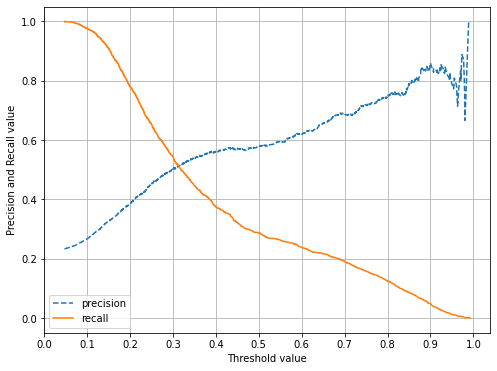

In [119]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

# - 5. 평가 -

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,dt_pred)))
print('DecisionTreeClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,rf_pred)))
print('RandomForestClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0: 4f}'.format(precision_score(y_test,lr_pred)))
print('LogisticRegression 재현율: {0: 4f}'.format(recall_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.8093
DecisionTreeClassifier 정밀도:  0.580910
DecisionTreeClassifier 재현율:  0.613485

RandomForestClassifier 정확도:0.8637
RandomForestClassifier 정밀도:  0.742063
RandomForestClassifier 재현율:  0.624166

LogisticRegression 정확도: 0.7880
LogisticRegression 정밀도:  0.578523
LogisticRegression 재현율:  0.287717


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 조원 기여도

###데이터 전처리 : 유지원, 한봉수
###데이터 세트분리 : 천지희
###모델학습 예측 평가 : 신동찬
###발표 : 한봉수